In [53]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage.interpolation import shift
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt

ticker = 'BTC-EUR'  # Ticker symbol for GOLD
start_date = '2009-01-01'  # Start date for the historical data
end_date = '2024-04-23'  # End date for the historical data

BTC_df0 = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [54]:
BTC_df0.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


In [55]:
BTC_df0.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,60099.343750,60729.519531,56185.281250,57433.480469,57433.480469,39286364669
2024-04-19,57432.187500,60151.753906,56914.769531,59676.964844,59676.964844,33831742410
2024-04-20,59675.082031,61440.464844,56170.074219,59876.710938,59876.710938,46818669689
2024-04-21,59883.777344,61376.257812,59247.250000,60956.074219,60956.074219,21662346331
2024-04-22,60954.554688,61639.593750,60245.773438,60919.242188,60919.242188,19240933719


In [56]:
BTC_df0.describe() #basic statistics

,Open,High,Low,Close,Adj Close,Volume
count,3506.000000,3506.000000,3506.000000,3506.000000,3506.000000,3.506000e+03
mean,14161.342122,14484.962103,13818.596063,14177.123329,14177.123329,1.524169e+10
std,15628.853199,15993.704547,15233.113307,15644.713762,15644.713762,1.687738e+10
min,150.128998,183.047470,145.483078,151.152512,151.152512,4.640334e+06
25%,950.744888,968.345154,925.353561,951.023758,951.023758,1.983761e+08
50%,7596.641357,7756.461426,7389.617432,7599.839355,7599.839355,1.149796e+10
75%,24837.997559,25109.685547,24438.803223,24851.295898,24851.295898,2.518394e+10
max,66720.078125,67416.492188,65274.687500,66723.851562,66723.851562,2.907271e+11


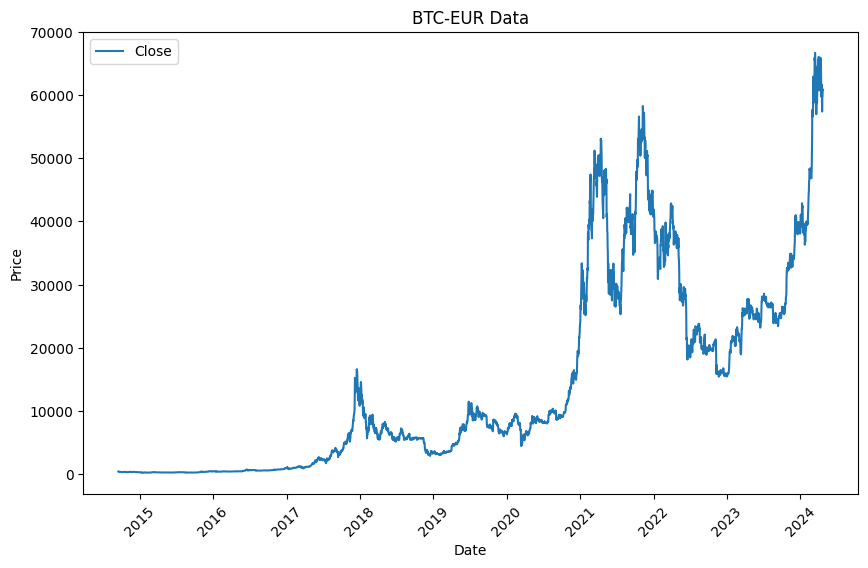

In [57]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot 'Close' price
sns.lineplot(x='Date', y='Close', data=BTC_df0, label='Close')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BTC-EUR Data')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Show the plot
plt.show()